# (4주차) 3월28일
> GradientTape 보충, **경사하강법**, 학습률
- toc:true
- branch: master
- badges: true
- comments: true
- author: 최규빈
- categories: [Bigdata]

---

In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import numpy as np

In [2]:
import tensorflow.experimental.numpy as tnp

In [63]:
import matplotlib.pyplot as plt 

In [3]:
tnp.experimental_enable_numpy_behavior()

### 미분 

#### tf.GradientTape() 사용방법

`-` 예제9: 카페 예제로 돌아오자. 

In [4]:
x=tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])

2022-03-28 19:21:12.403805: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 19:21:12.424856: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 19:21:12.425236: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-28 19:21:12.425800: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropri

In [5]:
tf.random.set_seed(43052)
epsilon=tf.random.normal([10])
y=10.2 + 2.2*x + epsilon

In [6]:
y  #잘 생성되었다.

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([55.4183651 , 58.19427589, 61.23082496, 62.31255873, 63.1070028 ,
       63.69569103, 67.24704918, 71.43650092, 73.10130336, 77.84988286])>

In [7]:
beta0 = tf.Variable(9.0)
beta1 = tf.Variable(2.0)

In [8]:
with tf.GradientTape(persistent=True) as tape:
    loss = sum((y-beta1*x-beta0)**2)

In [9]:
tape.gradient(loss, beta0), tape.gradient(loss, beta1)  #loss의 미분값

(<tf.Tensor: shape=(), dtype=float32, numpy=-126.78691>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-3208.8396>)

`-` 🥸시험🥸 **예제10: 카페 예제의 매트릭스 버전** 

In [10]:
X=tnp.array([1]*10+[20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]).reshape(2,10).T
X

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]])>

In [11]:
beta = tnp.array([9.0,2.0]).reshape(2,1)
beta

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.],
       [2.]])>

In [14]:
beta_true = tnp.array([10.2,2.2]).reshape(2,1)
y = X @ beta_true + epsilon.reshape(10,1)
y

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[55.4183651 ],
       [58.19427589],
       [61.23082496],
       [62.31255873],
       [63.1070028 ],
       [63.69569103],
       [67.24704918],
       [71.43650092],
       [73.10130336],
       [77.84988286]])>

In [22]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta)  #constant일 때, 꼭 확인
    yhat = X@beta
    loss = (y-yhat).T @ (y-yhat)

In [23]:
tape.gradient(loss,beta)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -126.78690968],
       [-3208.83947922]])>

`-` 위의 이론적인 값을 확인하면

In [32]:
-2 * X.T @ y + 2 * X.T @ X @ beta  #loss

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -126.78690968],
       [-3208.83947922]])>

`-` 🥸시험🥸 **예제11: 위의 예제에서 이론적인 $\boldsymbol{\beta}$의 최적값을 찾아보고 (즉 $\boldsymbol{\hat\beta}$을 찾고) 그 지점에서 loss의 미분값(=접선의 기울기)를 구하라. 결과가 $\bf{0}$인지 확인하라. (단 ${\bf 0}$은 길이가 2이고 각 원소가 0인 벡터)**

$\boldsymbol{\beta}$의 최적값은 $({\bf X}^\top {\bf X})^{-1}{\bf X}^\top {\bf y} $ 이다.

In [33]:
beta_optimal = tf.linalg.inv(X.T @ X) @ X.T @ y
beta_optimal

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.94457324],
       [2.21570461]])>

In [34]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta_optimal)  
    yhat = X@beta_optimal
    loss = (y-yhat).T @ (y-yhat)

In [35]:
tape.gradient(loss,beta_optimal)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-6.67910172e-12],
       [-1.67774636e-10]])>

`-` beta_true에서의 기울기도 계산해보자.

In [37]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta_true)  
    yhat = X@beta_true
    loss = (y-yhat).T @ (y-yhat)

In [38]:
tape.gradient(loss,beta_true)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -2.74690968],
       [-71.45947922]])>

- 현재에서는 true값보다 optimal에서 기울기가 더 작게 나타남.
- 샘플 사이즈가 커질수록 tape.gradient(loss,beta_true) $\approx$ tape.gradient(loss,beta_optimal)
- `beta_true` $\approx$ `beta_optimal`

---

## 경사하강법 

### 최적화문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$를 최소하는 $\beta$를 컴퓨터를 활용하여 구하는 문제를 생각해보자.  
- 답은 $\beta=2$임을 알고 있다.

### 방법1: grid search

#### 알고리즘 

(1) $beta = [-10.00, -9.99, ... , 10.00]$와 같은 리스트를 만든다.

(2) (1)의 리스트의 각 원소에 해당하는 $loss$를 구한다.

(3) (2)에서 구한 $loss$를 제일 작게 만드는 $beta$를 찾는다.

#### 구현코드 

In [53]:
beta = np.linspace(-10,10,100)
loss = (beta/2-1)**2

- 먼저 연습~

In [45]:
tnp.argmin([1,2,-3,3,4])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [46]:
tnp.argmin([1,2,3,-3,4])

<tf.Tensor: shape=(), dtype=int64, numpy=3>

- 대입하면

In [51]:
tnp.argmin(loss)

<tf.Tensor: shape=(), dtype=int64, numpy=59>

- 비슷한 값끼리 비교하려면

In [52]:
(beta[59]/2-1)**2   #beta[59]가 최적이다

0.0016324864809713505

In [50]:
(beta[60]/2-1)**2

0.0036730945821854847

#### 그리드서치의 문제점 

`-` 비판1: [-10,10]이외에 해가 존재하면? 
- 이 예제의 경우는 운좋게 [-10,10]에서 해가 존재했음
- 하지만 임의의 고정된 $x,y$에 대하여 $loss(\beta)=(x\beta-y)^2$ 의 형태의 해가 항상 [-10,10]에서 존재한다는 보장은 없음
- 해결책: 더 넓게 많은 범위를 탐색하자? $\to$ 무한대로 나아갈 수는 없기 때문에 해결책은 아니다..

`-` 비판2: 효율적이지 않음
- 알고리즘을 요약하면 결국 -10부터 10까지 작은 간격으로 조금씩 이동하며 loss를 조사하는 것이 grid search의 아이디어 
- $\to$ 생각해보니까 $\beta=2$인 순간 $loss=(\frac{1}{2}\beta-1)^2=0$이 되어서 이것보다 작은 최소값은 존재하지 않는다(제곱은 항상 양수이어야 하므로)
- $\to$ 따라서 $\beta=2$ 이후로는 탐색할 필요가 없다 

### 방법2: gradient descent

#### 알고리즘!

(1) $beta = -5$ 로 셋팅한다.  #초기값 세팅

In [54]:
(-5/2-1)**2

12.25

(2) $beta = -5$ 근처에서 조금씩 이동하여 $loss$를 조사한다.  #미분

In [55]:
(-4.99/2-1)**2   #오른쪽으로 0.01 이동 후 loss 조사

12.215025

In [57]:
(-5.01/2-1)**2   #왼쪽으로 0.01 이동 후 loss 조사

12.285025

(3) (2)의 결과를 잘 해석하고 더 유리한 쪽으로 이동한다.

(4) 위의 과정을 반복하고 어느 쪽으로 움직여도 이득이 없다면 멈춘다.

#### 알고리즘 분석 

`-` (2)-(3)의 과정은 `$beta=-5$에서 미분계수를 구하고 미분계수가 양수이면 왼쪽으로, 음수이면 오른쪽으로 움직인다`고 해석이 가능하다. 아래 그림을 보면 더 이해가 쉽다.

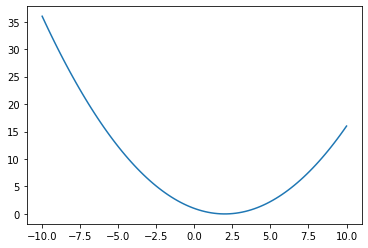

In [64]:
plt.plot(beta, loss)

#### 왼쪽/오른쪽중에 어디로 갈지 어떻게 판단하는 과정을 수식화?

`-` 아래와 같이 해석이 가능하다.

- 오른쪽으로 0.01 간다 = beta_old에 0.01을 더함. (if, 미분계수가 음수이면)
- 왼쪽으로 0.01 간다 = beta_old에 0.01을 빼야 함. (if, 미분계수가 양수이면)

`-` 그렇다면

$\beta_{new} = 
\begin{cases}
\beta_{old} + 0.01, &loss'(\beta_{old})<0 \\
\beta_{old} - 0.01, & loss'(\beta_{old})>0
\end{cases}$

#### 혹시 알고리즘을 좀 개선할수 있을까?

`-` 항상 0.01 만큼만 움직여야 하는가?

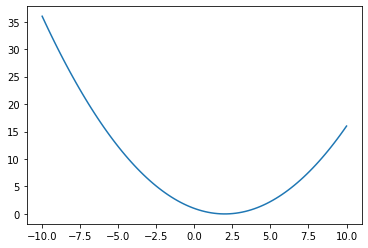

In [64]:
plt.plot(beta, loss)

$\to$ 최적점에서 가까울수록 보폭이 작으면 좋겠다.  
$\to$ 음/양수에 따라서 방향을, 절댓값 크기에 따라 보폭 크기를 정하면 되겠다!

`-` $\beta=-10$ 일 경우의 접선의 기울기? $\beta=-4$ 일때 접선의 기울기?

- $\beta=-10$일 때 기울기는 -6
- $\beta=-4$일 때 기울기는 -3

`-` 실제로 6,3씩 이동할 순 없으니 적당한 $\alpha$(예를 들면 $\alpha=0.01$)를 잡아서 곱한만큼 이동하자.

`-` 수식화하면

- $\beta_{new} = 
\beta_{old} - \alpha loss'(\beta_{old})$
- $\beta_{new} = 
\beta_{old} - \alpha \left[\frac{\partial}{\partial \beta} loss(\beta) \right]_{\beta = \beta_{old}}$

`-` 위 식을 +로 하면 최대값을 찾을 수 있겠다.

`-` $\alpha$의 의미
- $\alpha$가 크면 크게 움직이고, 작으면 작게 움직인다.
- $\alpha>0$이어야 한다.

#### **구현코드**

`-` **iter 1**

 $\beta = -10$이라고 하자.

In [76]:
beta = tf.Variable(-10.0)

In [77]:
with tf.GradientTape(persistent=True) as tape :
    loss = (beta/2-1)**2

In [78]:
tape.gradient(loss, beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

`-` $\beta = -10$에서 $0.01$만큼 움직이고 싶음.

In [79]:
alpha = 0.01/6

In [80]:
beta.assign_sub(alpha * tape.gradient(loss, beta))  #원래 할당값에 ()안의 숫자를 빼주는

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

In [81]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` **iter 2**

In [82]:
with tf.GradientTape(persistent=True) as tape :
    loss = (beta/2-1)**2

In [83]:
beta.assign_sub(tape.gradient(loss,beta)*alpha)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.980008>

`-` **for 문을 이용하자!**

(강의용)

In [96]:
beta = tf.Variable(-10.0)

In [97]:
for k in range(10000):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta)*alpha)

In [98]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.997125>

(시도1)

In [100]:
beta = tf.Variable(-10.0)

In [101]:
for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta)*alpha)

In [102]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.040152>

(시도2)

In [93]:
beta = tf.Variable(-10.0)

In [94]:
for k in range(1000):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta)*alpha)

In [95]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-3.2133687>

`-` 너무 느리다. $\to$ $\alpha$를 키워보자!

#### 학습률 (learning rate)

`-` $\alpha$에 따라서 함수의 수렴과정이 어떻게 달라지는지 시각화해보자.

##### [시각화 코드 예비학습] 

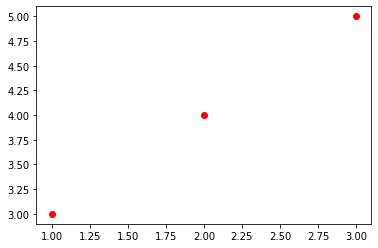

In [109]:
plt.plot([1,2,3],[3,4,5], 'or')

In [143]:
fig=plt.figure()  #도화지가 만들어지고 fig라는 이름을 붙인다.

<Figure size 432x288 with 0 Axes>

In [144]:
ax = fig.add_subplot()  #fig는 ax라는 물체를 만든다.

In [145]:
id(fig.axes[0])  #fig에 있는 것들을 보여주는 코드, 리스트형태

140542468107968

In [146]:
id(ax)

140542468107968

- 둘이 포함 관계에 있다는 것을 확인할 수 있음.

In [147]:
pnts, = ax.plot([1,2,3],[4,5,6], 'or')
pnts

- `,`를 붙이면 tuple이 된다.

In [148]:
pnts.get_xdata()

array([1, 2, 3])

In [149]:
pnts.get_ydata()

array([4, 5, 6])

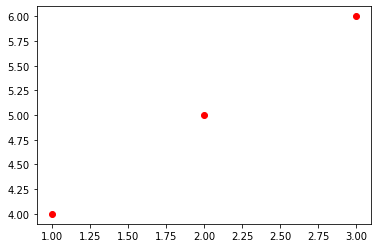

In [150]:
fig

In [151]:
pnts.set_ydata([5,5,5])

In [152]:
pnts.get_ydata()

[5, 5, 5]

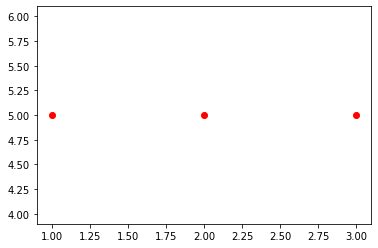

In [153]:
fig

`-` 응용

In [154]:
plt.rcParams["animation.html"]="jshtml"
from matplotlib import animation

In [155]:
def animate(i):
    if i%2 == 0:
        pnts.set_ydata([4,5,6])
    else:
        pnts.set_ydata([5,5,5])

In [156]:
ani = animation.FuncAnimation(fig,animate,frames=10)  #도화지와 애니메이션 룰을 인자로 가짐
ani

예비학습 끝 !

`-` beta_lst=[-10,-9,-8]로 이동한다고 하자.

In [179]:
beta_lst = [-10,-9,-8]
loss_lst = [(-10/2-1)**2,(-9/2-1)**2,(-8/2-1)**2]

In [180]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [181]:
ax = fig.add_subplot()

In [182]:
_beta = np.linspace(-15,19,100)

In [183]:
ax.plot(_beta, (_beta/2-1)**2)

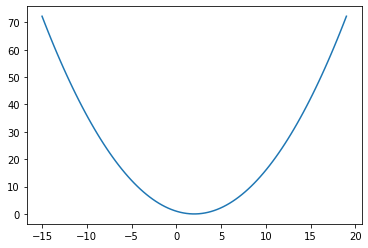

In [184]:
fig

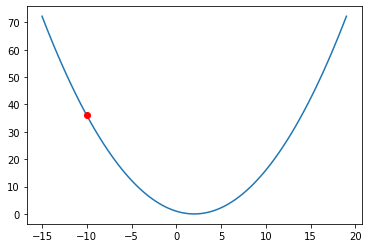

In [185]:
pnts, = ax.plot(beta_lst[0],loss_lst[0], 'ro')
fig

In [186]:
def animate(i) :
    pnts.set_xdata(beta_lst[:(i+1)])
    pnts.set_ydata(loss_lst[:(i+1)])

In [188]:
ani = animation.FuncAnimation(fig, animate, frames=3)
ani

`-` 최종 아웃풋

In [196]:
beta = tf.Variable(-10.0)
alpha = 0.01/6

In [197]:
beta_lst=[]
beta_lst.append(beta.numpy())
beta_lst

[-10.0]

In [198]:
loss_lst=[]
loss_lst.append((beta.numpy()/2-1)**2)
loss_lst

[36.0]

In [199]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta)
    loss = (beta/2-1)**2

In [201]:
beta.assign_sub(tape.gradient(loss, beta)*alpha)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

In [202]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2-1)**2)

In [204]:
beta_lst, loss_lst

([-10.0, -9.99], [36.0, 35.94002362785341])

`-` for

In [205]:
beta = tf.Variable(-10.0)
alpha = 0.01/6

beta_lst=[]
loss_lst=[]

beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2-1)**2)

for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(beta)
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss, beta)*alpha)
    beta_lst.append(beta.numpy())
    loss_lst.append((beta.numpy()/2-1)**2)

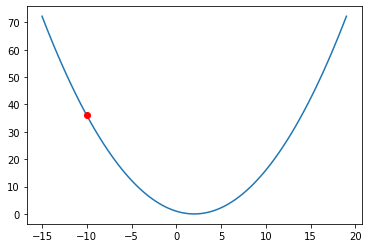

In [206]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(_beta,(_beta/2-1)**2)
pnts, = ax.plot(beta_lst[0],loss_lst[0],'or')


In [207]:
def animate(i) :
    pnts.set_xdata(beta_lst[:(i+1)])
    pnts.set_ydata(loss_lst[:(i+1)])

In [208]:
ani = animation.FuncAnimation(fig, animate, frames=100)
ani

---

### 숙제

**y=(x-1)^2을 최소화하는 x를 확률적 경사하강법으로 찾고 애니메이션으로 찾고 시각화할 것**

In [225]:
beta = tf.Variable(-3.0)
alpha = 0.05/3

beta_lst=[]
loss_lst=[]

beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()-1)**2)

for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(beta)
        loss = (beta-1)**2
    beta.assign_sub(tape.gradient(loss, beta)*alpha)
    beta_lst.append(beta.numpy())
    loss_lst.append((beta.numpy()-1)**2)

In [226]:
_beta = np.linspace(-19,21,100)

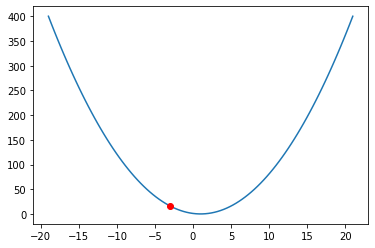

In [227]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(_beta,(_beta-1)**2)
pnts, = ax.plot(beta_lst[0],loss_lst[0],'or')

In [228]:
def animate(i) :
    pnts.set_xdata(beta_lst[:(i+1)])
    pnts.set_ydata(loss_lst[:(i+1)])

In [229]:
ani = animation.FuncAnimation(fig, animate, frames=100)
ani